In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from bg_mpl_stylesheets.styles import all_styles
from saf.filters import n_fold_filter, annulus_filter
from saf.ratchet_model_helpers import compute_loss_near_offset1
from saf.preprocessing_functions import normalize_min_max, mask_and_blur_annulus
plt.style.use(all_styles["bg-style"])

In [4]:
color_palettes = {
    "warm_earth": ["#4b2e39", "#8a2f2f", "#d94e1f", "#e4a81b", "#f2e3bc"],
    "sunset_glow": ["#7a0403", "#b42e1f", "#e65c00", "#ff9e00", "#ffd700"],
    "vibrant_green": ["#1b512d", "#4b8f29", "#76b820", "#a1d934", "#b8d98a"],
    "deep_ocean": ["#001219", "#005f73", "#0a9396", "#94d2bd", "#e9ecef"],
    "deep_ocean2": ["#001a33", "#00405a", "#00727a", "#5ea3a3", "#b8d5d8"],
    "dark_modern": ["#000000", "#14213d", "#005f73", "#14a76c", "#bde0fe"],
    "navy_teal": ["#002147", "#005f73", "#0a9396", "#94d2bd", "#e9d8a6"],
    "cool_blue": ["#0a1128", "#001f54", "#034078", "#1282a2", "#d8ebf1"],
    "ember_cool": ["#6e040f", "#b73727", "#f28f3b", "#a7c957", "#1b512d"],
    
    # Common Matplotlib colormaps
    "plasma": ["#0d0887", "#6a00a8", "#b12a90", "#e16462", "#fca636"],
    "jet": ["#00007f", "#007fff", "#7fff7f", "#ff7f00", "#7f0000"],
    "viridis": ["#440154", "#3b528b", "#21918c", "#5ec962", "#fde725"],
    "magma": ["#000004", "#3b0f70", "#8c2981", "#de4968", "#feb078"],
    "inferno": ["#000004", "#420a68", "#932667", "#dd513a", "#fba40a"],
    "cividis": ["#00204c", "#365d8d", "#8eb6c5", "#ead397", "#ffffe0"],
    "coolwarm": ["#3b4cc0", "#8999c1", "#e0e0e0", "#de6061", "#b40426"],
}


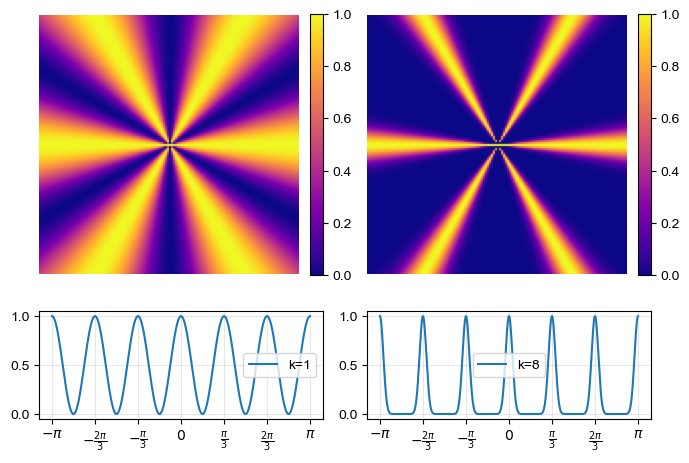

In [5]:
n_folds = 6
# stem_dp = np.load('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/data/4DSTEM_data/good4DSTEMdp.npz')['data']
def filter_function1D(k, offset, n_folds=n_folds):
    return np.exp(k * np.log((np.cos(n_folds / 2 * (offset)))**2))
theta = np.linspace(-np.pi, np.pi, 1000)
theta_ticks = np.linspace(-np.pi, np.pi, n_folds + 1)
theta_tick_labels = [r"$-\pi$", r"$-\frac{2\pi}{3}$", r"$-\frac{\pi}{3}$", r"$0$", 
                      r"$\frac{\pi}{3}$", r"$\frac{2\pi}{3}$", r"$\pi$"]

imshape = (128, 128)
cx, cy = imshape[1] // 2, imshape[0] // 2
fig, axs = plt.subplots(2, 2, figsize=(7, 5), gridspec_kw={'height_ratios': [3, 1]})
im0 = axs[0, 0].imshow(n_fold_filter(1, 0, 6, imshape=imshape, cx=cx, cy=cy), cmap='plasma', extent=[-64, 64, -64, 64])
axs[0, 0].axis('off')
fig.colorbar(im0, ax=axs[0, 0], orientation='vertical', fraction=0.046, pad=0.04)
axs[1, 0].plot(theta, filter_function1D(1, theta, 6), label="k=1")
axs[1, 0].set_xticks(theta_ticks)
axs[1, 0].set_xticklabels(theta_tick_labels)
axs[1, 0].grid(alpha=0.3)
axs[1, 0].legend()
im1 = axs[0, 1].imshow(n_fold_filter(8, 0, 6, imshape=imshape, cx=cx, cy=cy), cmap='plasma', extent=[-64, 64, -64, 64])
axs[0, 1].axis('off')
fig.colorbar(im1, ax=axs[0, 1], orientation='vertical', fraction=0.046, pad=0.04)
axs[1, 1].plot(theta, filter_function1D(8, theta, 6), label="k=8")
axs[1, 1].set_xticks(theta_ticks)
axs[1, 1].set_xticklabels(theta_tick_labels)
axs[1, 1].grid(alpha=0.3)
axs[1, 1].legend()
plt.tight_layout()
plt.show()


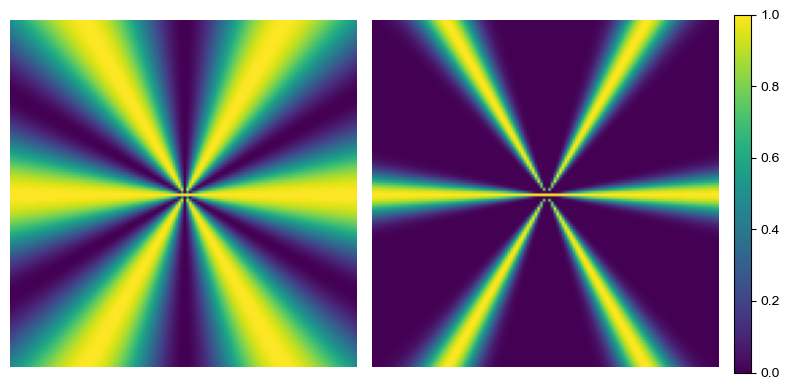

In [6]:
# Create a figure with a custom layout
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], figure=fig)

# Axes for the two plots
ax1 = fig.add_subplot(gs[0, 0], aspect='equal', adjustable='box')
ax2 = fig.add_subplot(gs[0, 1], aspect='equal', adjustable='box')

# Axes for the colorbar
cbar_ax = fig.add_subplot(gs[0, 2])

# Plot for k=1
im0 = ax1.imshow(n_fold_filter(1, 0, 6, imshape=imshape, cx=cx, cy=cy), cmap='viridis', extent=[-64, 64, -64, 64])
ax1.axis('off')  # Hide axes for 2D filter plot
# ax1.set_title("k=1")

# Plot for k=8
im1 = ax2.imshow(n_fold_filter(8, 0, 6, imshape=imshape, cx=cx, cy=cy), cmap='viridis', extent=[-64, 64, -64, 64])
ax2.axis('off')  # Hide axes for 2D filter plot
# ax2.set_title("k=8")

# Add a single detached colorbar with only 0 and 1 ticks
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='vertical')
# cbar.ax.set_yticklabels(['0','0.5', '1'])  # Ensure tick labels are formatted as integers
cbar.ax.tick_params()

# Adjust layout
plt.tight_layout()
plt.show()

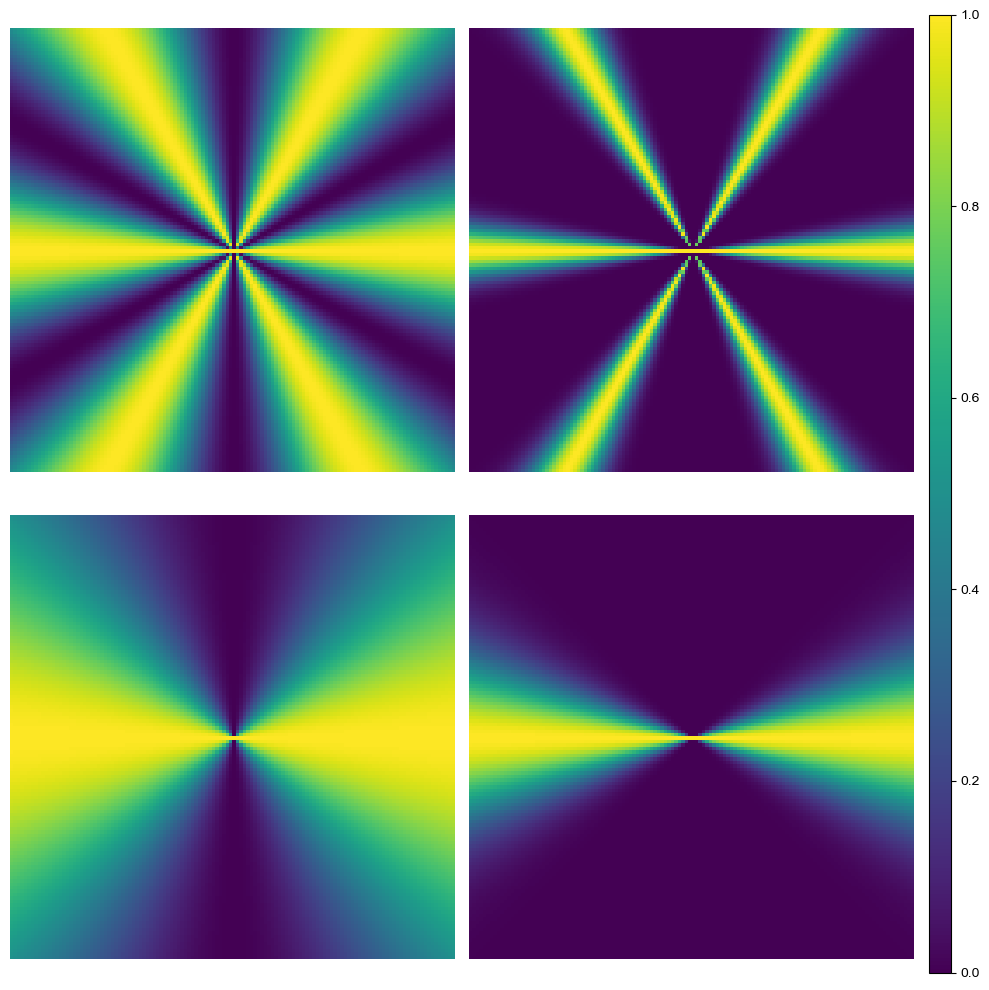

In [7]:

# Create a figure with a custom layout
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 3, width_ratios=[1, 1, 0.05], height_ratios=[1, 1], figure=fig)

# Axes for the four plots
ax1 = fig.add_subplot(gs[0, 0], aspect='equal', adjustable='box')
ax2 = fig.add_subplot(gs[0, 1], aspect='equal', adjustable='box')
ax3 = fig.add_subplot(gs[1, 0], aspect='equal', adjustable='box')
ax4 = fig.add_subplot(gs[1, 1], aspect='equal', adjustable='box')

# Axes for the colorbar
cbar_ax = fig.add_subplot(gs[:, 2])

# Plot for k=1
im0 = ax1.imshow(n_fold_filter(1, 0, 6, imshape=imshape, cx=cx, cy=cy), cmap='viridis', extent=[-64, 64, -64, 64])
ax1.axis('off')  # Hide axes for 2D filter plot
# ax1.set_title(r"$k=1, n_{\text{folds}} = 6$", fontsize=30)

# Plot for k=8
im1 = ax2.imshow(n_fold_filter(8, 0, 6, imshape=imshape, cx=cx, cy=cy), cmap='viridis', extent=[-64, 64, -64, 64])
ax2.axis('off')  # Hide axes for 2D filter plot
# ax2.set_title(r"$k=8, n_{\text{folds}} = 6$", fontsize=30)

# Plot for k=2
im2 = ax3.imshow(n_fold_filter(1, 0, n_folds=2, imshape=imshape, cx=cx, cy=cy), cmap='viridis', extent=[-64, 64, -64, 64])
ax3.axis('off')
# ax3.set_title(r"$k=1, n_{\text{folds}} = 2$", fontsize=30)

# Plot for k=16
im3 = ax4.imshow(n_fold_filter(8, 0, n_folds=2, imshape=imshape, cx=cx, cy=cy), cmap='viridis', extent=[-64, 64, -64, 64])
ax4.axis('off')
# ax4.set_title(r"$k=8, n_{\text{folds}} = 2$", fontsize=30)

# Add a single detached colorbar with only 0 and 1 ticks
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='vertical')
# cbar.ax.set_yticklabels(['0','0.5', '1'])  # Ensure tick labels are formatted as integers
# cbar.ax.tick_params(labelsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

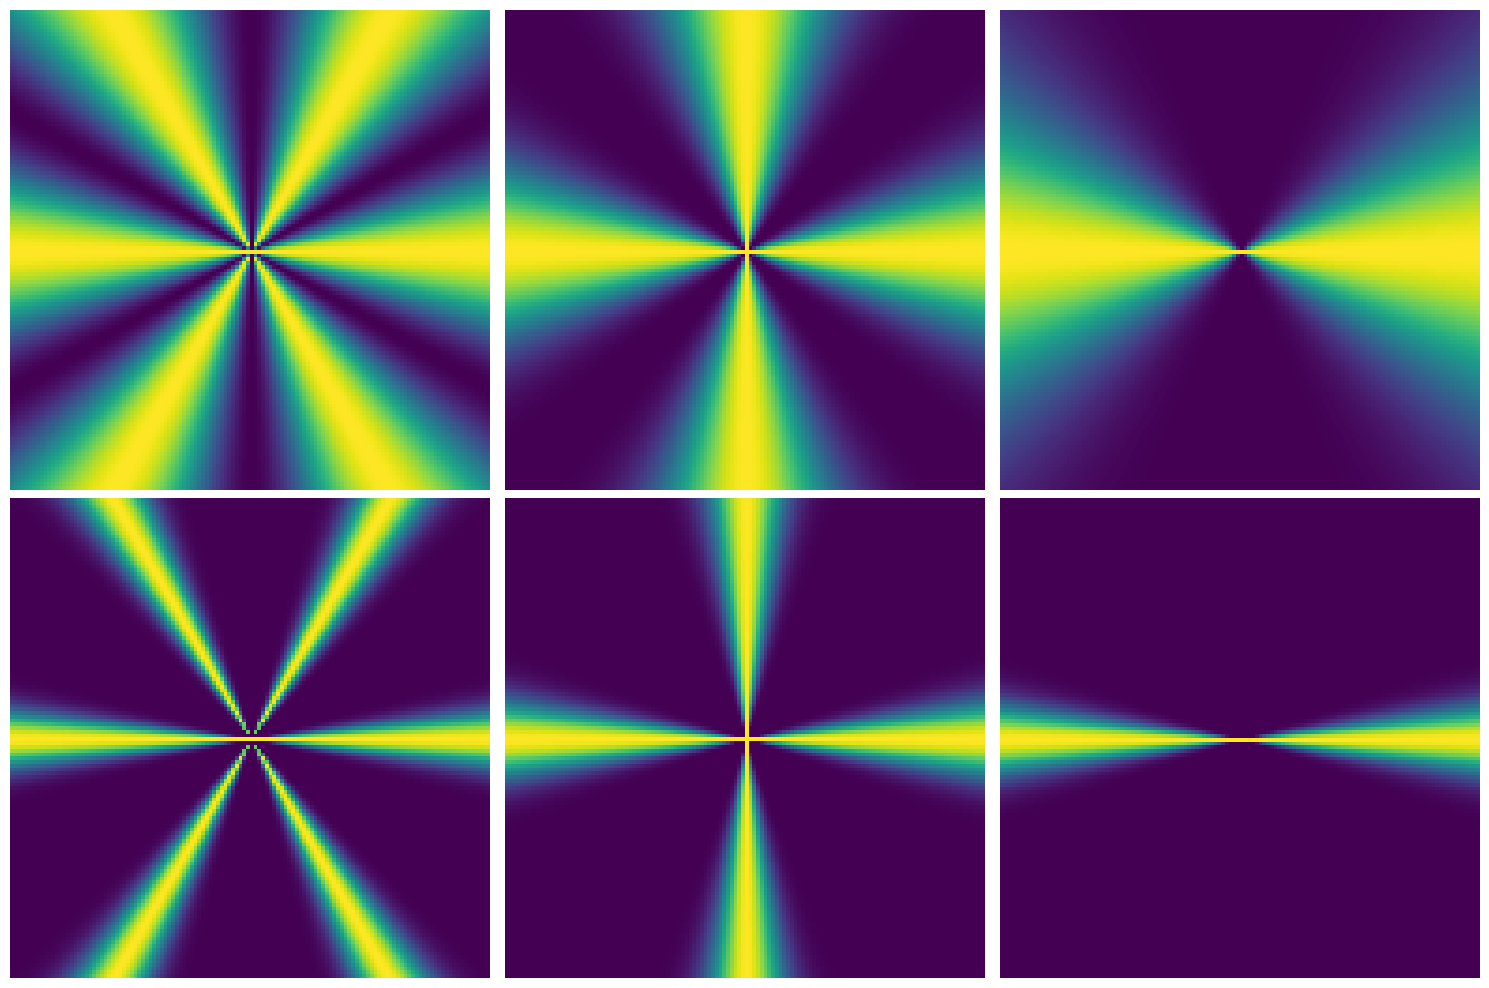

In [8]:
# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Define k and n_folds values for each subplot (6 in column 1, 4 in column 2, and 2 in column 3)
params = [(1, 6), (2, 4), (3, 2), (8, 6), (10, 4), (50, 2)]  # Ensure that k changes appropriately

# Loop over the subplots and plot each filter
for i, (ax) in enumerate(axes.flat):
    k, n_folds = params[i]
    im = ax.imshow(n_fold_filter(k, 0, n_folds=n_folds, imshape=imshape, cx=cx, cy=cy), 
                   cmap='viridis', extent=[-64, 64, -64, 64])
    ax.axis('off')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()


## circular filter

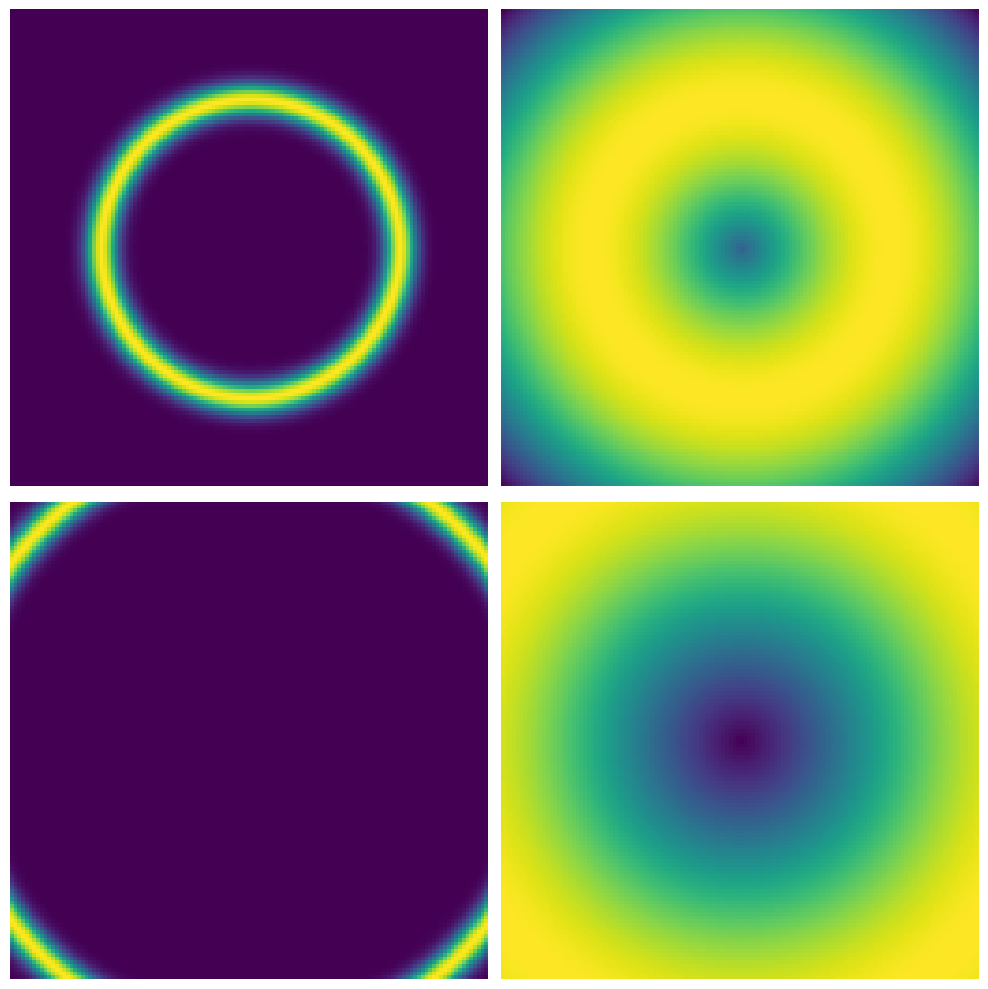

In [9]:
# Two with the same r=80 but different sd
x1 = annulus_filter(40, sd=3, imshape=imshape, cx=cx, cy=cy )
y1 = annulus_filter(40, sd=50, imshape=imshape, cx=cx, cy=cy)

# Two with the same sd=10 but different r
x2 = annulus_filter(80, sd=3, imshape=imshape, cx=cx, cy=cy)
y2 = annulus_filter(80, sd=50, imshape=imshape, cx=cx, cy=cy)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(x1)
ax[0, 0].axis('off')

ax[0, 1].imshow(y1)
ax[0, 1].axis('off')

ax[1, 0].imshow(x2)
ax[1, 0].axis('off')

ax[1, 1].imshow(y2)
ax[1, 1].axis('off')

plt.tight_layout()
# plt.savefig('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/figs_for_papers/circle_filter.png')
plt.show()


## Filter plus intensity data

viridis


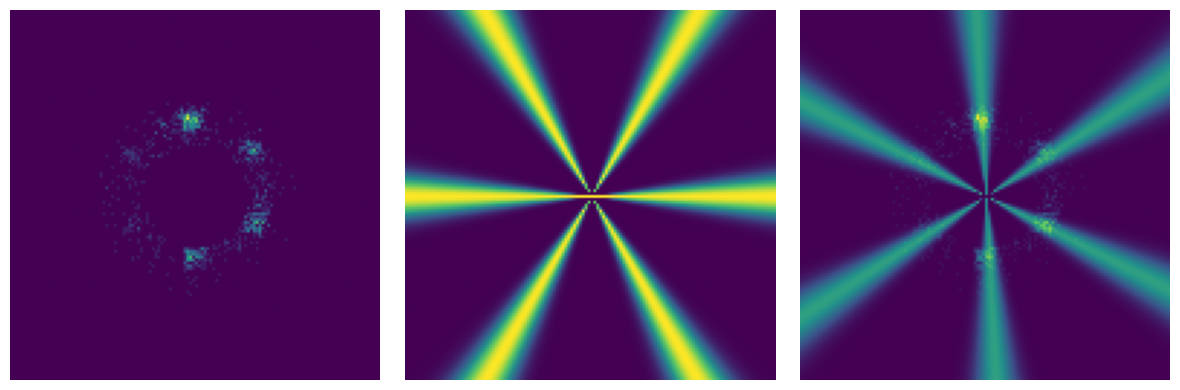

In [10]:
numor = 64690
path_to_npz = f'/Users/cadenmyers/billingelab/dev/sym_adapted_filts/data/SkL_data/npz_sept_numor_data/{numor}.npz'
data = np.load(path_to_npz)['data']# Generate filter
intensity_image = mask_and_blur_annulus(data[17], inner_radius=18, outer_radius=35)
# plt.imshow(intensity_image)
# plt.show()


color_palettes = {
    "warm_earth": ["#4b2e39", "#8a2f2f", "#d94e1f", "#e4a81b", "#f2e3bc"],
    "sunset_glow": ["#7a0403", "#b42e1f", "#e65c00", "#ff9e00", "#ffd700"],
    "vibrant_green": ["#1b512d", "#4b8f29", "#76b820", "#a1d934", "#b8d98a"],
    "deep_ocean": ["#001219", "#005f73", "#0a9396", "#94d2bd", "#e9ecef"],
    "deep_ocean2": ["#001a33", "#00405a", "#00727a", "#5ea3a3", "#b8d5d8"],
    "dark_modern": ["#000000", "#14213d", "#005f73", "#14a76c", "#bde0fe"],
    "navy_teal": ["#002147", "#005f73", "#0a9396", "#94d2bd", "#e9d8a6"],
    "cool_blue": ["#0a1128", "#001f54", "#034078", "#1282a2", "#d8ebf1"],
    "ember_cool": ["#6e040f", "#b73727", "#f28f3b", "#a7c957", "#1b512d"],
    
    # Common Matplotlib colormaps
    "plasma": ["#0d0887", "#6a00a8", "#b12a90", "#e16462", "#fca636"],
    "jet": ["#00007f", "#007fff", "#7fff7f", "#ff7f00", "#7f0000"],
    "viridis": ["#440154", "#3b528b", "#21918c", "#5ec962", "#fde725"],
    "magma": ["#000004", "#3b0f70", "#8c2981", "#de4968", "#feb078"],
    "inferno": ["#000004", "#420a68", "#932667", "#dd513a", "#fba40a"],
    "cividis": ["#00204c", "#365d8d", "#8eb6c5", "#ead397", "#ffffe0"],
    "coolwarm": ["#3b4cc0", "#8999c1", "#e0e0e0", "#de6061", "#b40426"],
}
palette_keys = list(color_palettes.keys())
palette_index = 11
selected_key = palette_keys[palette_index]
colors = color_palettes[selected_key]
cmap = LinearSegmentedColormap.from_list(selected_key, colors, N=256)
print(selected_key)

k = 8.4
offset = np.deg2rad(-27)  # Example value
n_folds = 6  # Example value
filter_img = n_fold_filter(k, offset, n_folds, imshape=imshape, cx=cx, cy=cy)

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot filter
axes[1].imshow(n_fold_filter(k, np.deg2rad(0), n_folds, imshape=imshape, cx=cx, cy=cy), cmap=cmap)
# axes[0].set_title("Filter")

# Plot intensity image
axes[0].imshow(intensity_image, cmap=cmap)
# axes[1].set_title("Intensity Image")

# Plot overlay
overlay = filter_img + normalize_min_max(intensity_image)  # Element-wise multiplication for overlay
axes[2].imshow(overlay, cmap=cmap)
# axes[2].set_title("Overlay")

# Remove axis ticks
for ax in axes:
    ax.axis('off')

# Add plus and equals signs
# fig.text(0.375, 0.5, "+", fontsize=40, ha="center", va="center")
# fig.text(0.648, 0.5, "=", fontsize=40, ha="center", va="center")
# fig.suptitle('Peak Tracking via Gradient Descent', fontsize=25)

plt.tight_layout()
plt.savefig('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/figures/peak_tracking_example.pdf', dpi=300, bbox_inches='tight')
plt.show()


## azimuthal sum

NameError: name 'azimuthal_sum_w_filter' is not defined

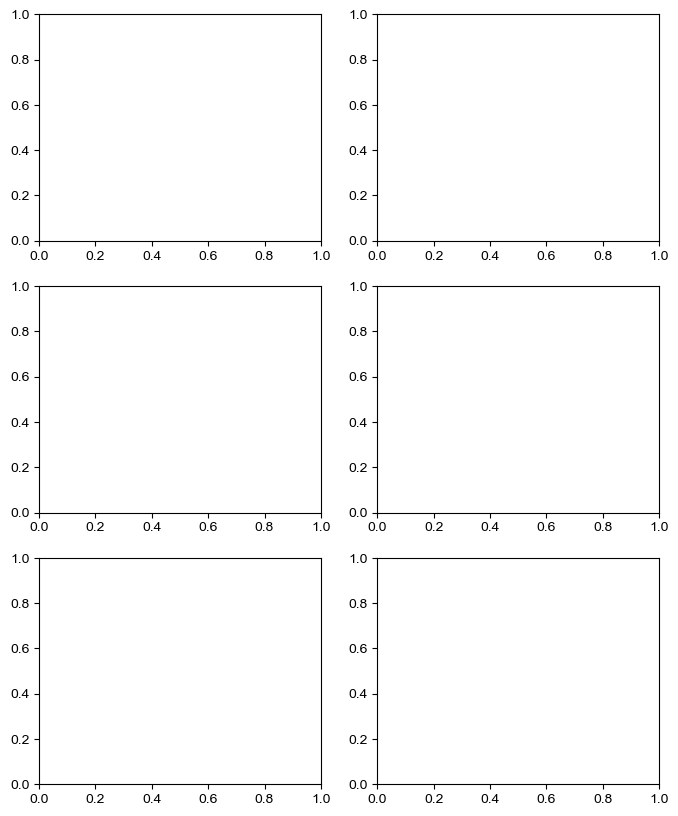

In [11]:
intensity_image = data[17]


def azimuthal_sum(image, num_bins, center=None):
    # Image dimensions
    ny, nx = image.shape
    if center is None:
        center = (nx // 2, ny // 2)  # Default to image center

    x, y = np.meshgrid(np.arange(nx) - center[0], np.arange(ny) - center[1])

    # Compute angles in radians and map them to [0, 2π], with 0° at +x-axis
    phi = np.arctan2(-y, x)  # Negate y to set +x as 0°
    phi[phi < 0] += 2 * np.pi  # Convert range from [-π, π] to [0, 2π]
    # Bin the angles and sum intensities
    bin_edges = np.linspace(0, 2*np.pi, num_bins + 1)
    intensity, _ = np.histogram(phi, bins=bin_edges, weights=image)

    # Convert angles to degrees
    phi = np.degrees(bin_edges[:-1])

    return phi, intensity

ks = [20, 100, 500] #50, 200, 800]
num_rows = len(ks)  # One row per k value

fig, axes = plt.subplots(num_rows, 2, figsize=(8, 10))  # 2 columns (plots), multiple rows

max_angle = 360
for i, k in enumerate(ks):
    n_folds = 1
    phi, intensity = azimuthal_sum(intensity_image, num_bins=max_angle*2)
    intensity[intensity > 3000] = 3000
    # intensity = np.delete(intensity, 0) # delete first value bc it screws up intensity
    intensity_norm = normalize_min_max(intensity)
    _, overlap, _ = azimuthal_sum_w_filter(intensity_image, k, n_folds, max_angle=max_angle)

    # Left plot: Azimuthal sum
    axes[i, 0].plot(phi, intensity_norm, alpha=.5)
    axes[i, 0].plot(phi, overlap) # , label=r"$\mathcal{O}(\phi)$,"+ f" k={k}"
    # axes[i, 0].set_xlabel("Azimuthal Angle (Degrees)", fontsize=16)
    # axes[i, 0].set_ylabel("Normalized Intensity")
    # axes[i, 0].set_title(f"Azimuthal Sum (k={k})")
    axes[i, 0].grid(True)
    # axes[i, 0].legend()
    if i == len(ks) - 1:  # Last row only
        axes[i, 0].set_xlabel("Azimuthal Angle (Degrees)")
    # Right plot: Filtered intensity image
    im = axes[i, 1].imshow(normalize_min_max(intensity_image) + filter_function(k, 0, n_folds), origin="lower")
    # axes[i, 1].set_title(f"Filtered Image (k={k})")
    axes[i, 1].axis("off")  # Remove axes
    axes[i, 0].label_outer()

    # fig.suptitle("Overall Title for All Subplots", fontsize=16)  # Adjust fontsize as needed

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig(f'overlap_vs_phi{n_folds}.png')
plt.show()

## Convolution with different ks and rs

In [ ]:
data = np.load(path_to_npz)['data']# Generate filter
intensity_image = data[17]

stem_dp = np.load('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/4DSTEM/data_and_figs/good4DSTEMdp.npz')['data']

import numpy as np

def radial_integrate(dp, center=None):
    height, width = dp.shape
    if center is None:
        center = (height // 2, width // 2)
    y, x = np.indices(dp.shape)
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2)
    r = r.astype(int)
    max_r = np.max(r)
    intensity = np.bincount(r.ravel(), weights=dp.ravel())
    counts = np.bincount(r.ravel())
    intensity[counts > 0] /= counts[counts > 0]
    radii = np.arange(len(intensity))
    return radii, intensity

# Define subplots in a 2x2 grid

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# First plot: Azimuthal sum
phi, intensity = azimuthal_sum(intensity_image, num_bins=max_angle * 2)
intensity[intensity>4000] = 100 # clip raw intensity for plotting purpose
scaled_intensity = 50*intensity # scale raw intensity for plotting purpose
axes[0, 0].plot(phi, scaled_intensity, alpha=0.3, label='Azimuthal Intensity Sum')

# Loop over k values and plot
ks = [8]  # Different k values
# ks = [20, 8, 1]  # Different k values

for i, k in enumerate(ks):
    n_folds = 6
    phi, intensity, _ = azimuthal_sum_w_filter(intensity_image, k, n_folds, max_angle)
    # if i ==1:
    #     intensity = intensity - 50000
    # if i==2:
    #     intensity = intensity - 175000
    axes[0, 0].plot(phi, intensity, label=fr'$\mathcal{{O}}(\phi), ~k={k}$', alpha=0.7)

axes[0, 0].set_xlabel("Azimuthal Angle (Degrees)")
axes[0, 0].set_ylabel("Intensity")
axes[0, 0].legend()
axes[0, 0].grid(True)

# First image
axes[0, 1].imshow(intensity_image)
axes[0, 1].axis('off')

# Second plot: Radial sum
radii, raw_intensity = radial_integrate(stem_dp)
axes[1, 0].plot(radii, raw_intensity, alpha=0.3, label='Radial Sum')

sds = [25, 10, 3]
for sd in sds:
    r_overlap_score = []
    for r in radii:
        overlap = (stem_dp * annulus_filter(r_0=r, sd=sd)).sum()
        r_overlap_score.append(overlap)
    r_overlap_score = np.array(r_overlap_score)
    axes[1, 0].plot(radii, r_overlap_score, label=fr'$\mathcal{{O}}(r), ~\sigma={sd}$', alpha=.8)

axes[1, 0].set_xlabel("Radius (pixels)")
axes[1, 0].set_ylabel("Intensity")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Second image
axes[1, 1].imshow(stem_dp)
axes[1, 1].axis('off')

# Adjust layout and save
# plt.subplots_adjust(right=1.05)

plt.tight_layout()
plt.savefig('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/figs_for_papers/overlap_v_param.png')
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First plot: Azimuthal sum
phi, intensity = azimuthal_sum(intensity_image, num_bins=max_angle * 2)
intensity[intensity > 4000] = 100  # clip raw intensity for plotting purpose
scaled_intensity = 50 * intensity  # scale raw intensity for plotting purpose
axes[0].plot(phi, scaled_intensity, alpha=0.3, label='Azimuthal Intensity Sum')

# Loop over k values and plot
ks = [8]  # Different k values

for k in ks:
    n_folds = 6
    phi, intensity, _ = azimuthal_sum_w_filter(intensity_image, k, n_folds, max_angle)
    axes[0].plot(phi, intensity, label=fr'$\mathcal{{O}}(\phi), ~k={k}$', alpha=0.7)

axes[0].set_xlabel("Azimuthal Angle (Degrees)")
axes[0].set_ylabel("Intensity")
axes[0].legend()
axes[0].grid(True)

# First image
axes[1].imshow(intensity_image)
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Second der peak finding

64690


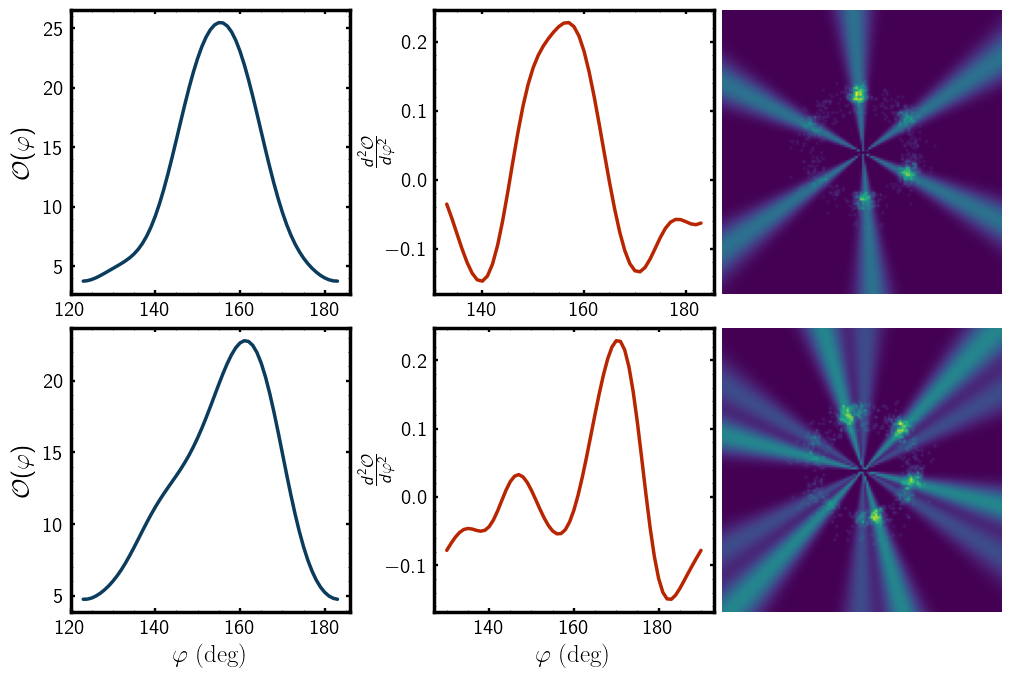

In [38]:
offsets1 = np.load('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/data/SkL_data/calculated_offsets/ratchet_offsets_64690.npz')['offset1']
offsets2 = np.load('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/data/SkL_data/calculated_offsets/ratchet_offsets_64690.npz')['offset2']
plt.rcParams['font.family'] = 'Arial'

i1 = 12
dp1dom = mask_and_blur_annulus(normalize_min_max(data[i1]), sigma=.5, inner_radius=18, outer_radius=35)
offset1_1 = offsets1[i1]
i2 = 13
dp2dom = mask_and_blur_annulus(normalize_min_max(data[i2]), sigma=.5, inner_radius=18, outer_radius=35) #data[16]
offset1_2 = offsets1[i2]
offset2_2 = offsets2[i2]
print(numor)
# stylesheet colors by index
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

figsize = (15/1.5, 10/1.5)
fig, ax = plt.subplots(2, 3, figsize=figsize, constrained_layout=True)

# Dynamically scale font size based on figure size
base_fontsize = 48
scale_factor = (figsize[0] * figsize[1]) / (15 * 10)
fontsize = base_fontsize * scale_factor
fontsize = 18
# offset1_1, offset2_1 = grid_search_offset_cw([dp1dom], 15, 15, n_folds=6,)
offset_values_1, loss_values, first_derivative, second_derivative_1 = compute_loss_near_offset1(dp1dom, np.deg2rad(offset1_1), n_folds=6, k=8.4)
offset_vals1_deg = np.rad2deg(offset_values_1)

# First row
ax[0,2].imshow(dp1dom + 1/4*n_fold_filter(8.4, np.deg2rad(offset1_1), 6, imshape=dp1dom.shape, cx=dp1dom.shape[1]//2, cy=dp1dom.shape[0]//2),
               aspect='auto')
ax[0,2].axis('off')
ax[0,0].plot(offset_vals1_deg, -loss_values)
# ax[0,0].axvline(offset1_1-1, color='gray', linestyle="dotted")
ax[0,0].set_ylabel(r'$\mathcal{O}(\varphi)$', rotation=90, labelpad=15, va='center', fontsize=fontsize)
# ax[0,0].grid(True)
ax[0,1].plot(offset_vals1_deg[10:], second_derivative_1[10:], color_cycle[1])
ax[0,1].set_ylabel(r'$\frac{d^2\mathcal{O}}{d\varphi^2}$', rotation=90, labelpad=6, va='center', fontsize=fontsize)
# ax[0,1].grid(True)

# Second row
offset_values, loss_values, first_derivative, second_derivative = compute_loss_near_offset1(dp2dom, np.deg2rad(offset1_2), n_folds=6, k=8.4)
offset_vals2_deg = np.rad2deg(offset_values)

ax[1,2].imshow(dp2dom + 1/4*n_fold_filter(8.4, np.deg2rad(offset1_2), 6, imshape=dp2dom.shape, cx=dp2dom.shape[0]/2, cy=dp2dom.shape[1]/2)
               + 1/8*n_fold_filter(8.4, np.deg2rad(offset2_2), 6, imshape=dp2dom.shape, cx=dp2dom.shape[1]//2, cy=dp2dom.shape[0]//2), 
               aspect='auto')
ax[1,2].axis('off')
ax[1,0].plot(offset_vals1_deg, -loss_values)
# ax[1,0].axvline(offset1_2-12.5, color='gray', linestyle="dotted")
ax[1,0].set_ylabel(r'$\mathcal{O}(\varphi)$', rotation=90, labelpad=15, va='center', fontsize=fontsize)
# ax[1,0].grid(True)
ax[1,1].plot(offset_vals2_deg, second_derivative, color=color_cycle[1])
# ax[1,1].axvspan(offset2_2 + 120 - shade_width-5, offset2_2 + 120 + shade_width, color='gray', alpha=0.3)
ax[1,1].set_ylabel(r'$\frac{d^2\mathcal{O}}{d\varphi^2}$', rotation=90, labelpad=6, va='center', fontsize=fontsize)
# ax[1,1].grid(True)

for row in ax:
    for a in row:
        a.minorticks_on()
        a.tick_params(
            which='both',      # apply to both major and minor ticks
            direction='in',    # ticks point inwards
            top=True,          # show ticks on top
            right=True,        # show ticks on right
            length=3,          # length of major ticks
        )
        a.tick_params(
            which='minor',
            length=1.5,  # length of minor ticks
        )

# Add the x-label only to the bottom row
for a in ax[1,:]:
    a.set_xlabel(r'$\varphi$' + " (deg)", fontsize=fontsize)

# plt.tight_layout()
# plt.savefig('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/figures/secondderoverlap.pdf')
plt.show()


64690


Text(0, 0.5, '$\\frac{d^2\\mathcal{O}}{d\\varphi^2}$')

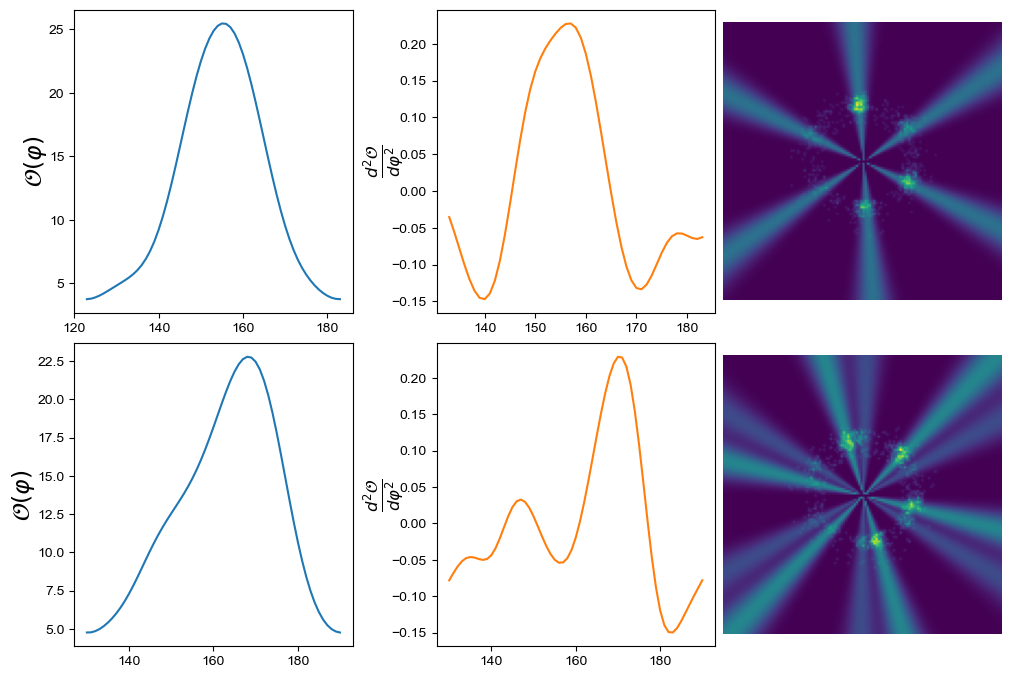

In [12]:
offsets1 = np.load('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/data/SkL_data/calculated_offsets/ratchet_offsets_64690.npz')['offset1']
offsets2 = np.load('/Users/cadenmyers/billingelab/dev/sym_adapted_filts/data/SkL_data/calculated_offsets/ratchet_offsets_64690.npz')['offset2']
plt.rcParams['font.family'] = 'Arial'

i1 = 12
i2 = 13

dp1dom = mask_and_blur_annulus(normalize_min_max(data[i1]), sigma=0.5, inner_radius=18, outer_radius=35)
dp2dom = mask_and_blur_annulus(normalize_min_max(data[i2]), sigma=0.5, inner_radius=18, outer_radius=35)

offset1_1 = offsets1[i1]
offset1_2 = offsets1[i2]
offset2_2 = offsets2[i2]

print(numor)

# stylesheet colors by index
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

figsize = (15/1.5, 10/1.5)
fig, ax = plt.subplots(2, 3, figsize=figsize, constrained_layout=True)

# Dynamically scale font size based on figure size
base_fontsize = 48
scale_factor = (figsize[0] * figsize[1]) / (15 * 10)
fontsize = 17  # Override for consistent display

# First row
offset_values_1, loss_values_1, first_derivative_1, second_derivative_1 = compute_loss_near_offset1(
    dp1dom, np.deg2rad(offset1_1), n_folds=6, k=8.4
)
offset_vals1_deg = np.rad2deg(offset_values_1)

cx1, cy1 = dp1dom.shape[1] // 2, dp1dom.shape[0] // 2
ax[0, 2].imshow(dp1dom + 1/4 * n_fold_filter(8.4, np.deg2rad(offset1_1), 6, imshape=dp1dom.shape, cx=cx1, cy=cy1))
ax[0, 2].axis('off')

ax[0, 0].plot(offset_vals1_deg, -loss_values_1)
ax[0, 0].set_ylabel(r'$\mathcal{O}(\varphi)$', rotation=90, labelpad=10, va='center', fontsize=fontsize)

ax[0, 1].plot(offset_vals1_deg[10:], second_derivative_1[10:], color=color_cycle[1])
ax[0, 1].set_ylabel(r'$\frac{d^2\mathcal{O}}{d\varphi^2}$', rotation=90, labelpad=6, va='center', fontsize=fontsize)

# Second row
offset_values_2, loss_values_2, first_derivative_2, second_derivative_2 = compute_loss_near_offset1(
    dp2dom, np.deg2rad(offset1_2), n_folds=6, k=8.4
)
offset_vals2_deg = np.rad2deg(offset_values_2)

cx2, cy2 = dp2dom.shape[1] // 2, dp2dom.shape[0] // 2
filter1 = 1/4 * n_fold_filter(8.4, np.deg2rad(offset1_2), 6, imshape=dp2dom.shape, cx=cx2, cy=cy2)
filter2 = 1/8 * n_fold_filter(8.4, np.deg2rad(offset2_2), 6, imshape=dp2dom.shape, cx=cx2, cy=cy2)
ax[1, 2].imshow(dp2dom + filter1 + filter2)
ax[1, 2].axis('off')

ax[1, 0].plot(offset_vals2_deg, -loss_values_2)
ax[1, 0].set_ylabel(r'$\mathcal{O}(\varphi)$', rotation=90, labelpad=10, va='center', fontsize=fontsize)

ax[1, 1].plot(offset_vals2_deg, second_derivative_2, color=color_cycle[1])
ax[1, 1].set_ylabel(r'$\frac{d^2\mathcal{O}}{d\varphi^2}$', rotation=90, labelpad=6, va='center', fontsize=fontsize)


In [ ]:
figsize = (6, 5)
fig, ax = plt.subplots(2, 2, figsize=figsize)

# Dynamically scale font size based on figure size
base_fontsize = 36
scale_factor = (figsize[0] * figsize[1]) / (17 * 10)
fontsize = base_fontsize * scale_factor

# offset1_1, offset2_1 = grid_search_offset_cw([dp1dom], 15, 15, n_folds=6,)
offset_values_1, loss_values, first_derivative, second_derivative_1 = compute_loss_near_offset1(dp1dom, np.deg2rad(offset1_1))
offset_vals1_deg = np.rad2deg(offset_values_1)

shade_width = 5  # Adjust this value for a wider/narrower shaded region

# First row
ax[0,0].plot(offset_vals1_deg, -loss_values)
ax[0,0].axvline(offset1_1-1, color='gray', linestyle="dotted")
ax[0,0].set_ylabel(r'$\mathcal{O}(\phi)$', rotation=0, labelpad=30, va='center', fontsize=fontsize)
ax[0,0].grid(True)
ax[0,1].plot(offset_vals1_deg, second_derivative_1, color=color_cycle[1])
ax[0,1].set_ylabel(r'$\frac{d^2\mathcal{O}}{d\phi^2}$', rotation=0, labelpad=10, va='center', fontsize=fontsize)
ax[0,1].grid(True)

# Second row
offset_values, loss_values, first_derivative, second_derivative = compute_loss_near_offset1(dp2dom, np.deg2rad(offset1_2))
offset_vals2_deg = np.rad2deg(offset_values)

ax[1,0].plot(offset_vals1_deg, -loss_values)
ax[1,0].axvline(offset1_2-12.5, color='gray', linestyle="dotted")
ax[1,0].set_ylabel(r'$\mathcal{O}(\phi)$', rotation=0, labelpad=30, va='center', fontsize=fontsize)
ax[1,0].grid(True)
ax[1,1].plot(offset_vals2_deg, second_derivative, color=color_cycle[1])
ax[1,1].axvspan(offset2_2 + 120 - shade_width, offset2_2 + 120 + shade_width, color='gray', alpha=0.3)
ax[1,1].set_ylabel(r'$\frac{d^2\mathcal{O}}{d\phi^2}$', rotation=0, labelpad=10, va='center', fontsize=fontsize)
ax[1,1].grid(True)

# Add the x-label only to the bottom row
for a in ax[1,:]:
    a.set_xlabel(r'$\phi$', fontsize=fontsize)

plt.tight_layout()
plt.show()
